In [4]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
# from python-graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

ModuleNotFoundError: No module named 'graphviz'

In [18]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [20]:
df_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [21]:
df_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [22]:
# преобразуем датасет для классификации
X_train = df_train.drop(['species', 'Unnamed: 0'], axis=1)
y_train = df_train['species']

X_test = df_test.drop(['species', 'Unnamed: 0'], axis=1)
y_test = df_test['species']


In [30]:
# зададим глубине дерева диапазон
max_depth_values = range(1, 100)

# создадим пустой датафрейм для накопления данных
scores_data = pd.DataFrame()

# итерируемся 100 раз в разной глубиной дерева
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    accuracy_score = clf.score(X_test, y_test)
    
    temp_data = pd.DataFrame({ 
        'max_depth': [max_depth], 
        'train_score': [train_score], 
        'accuracy_score': [accuracy_score]
    })
    scores_data = scores_data.append(temp_data)

In [31]:
scores_data.head()

,max_depth,train_score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [32]:
# преобразуем (расплавим) таблицу для визуализации
score_data_long = pd.melt(scores_data, 
                          id_vars=['max_depth'], 
                          value_vars=['train_score', 'accuracy_score'], 
                          var_name='set_type', 
                          value_name='score'
                         )
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


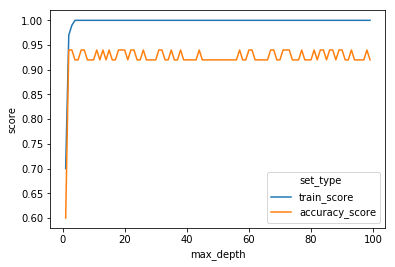

In [33]:
# построим график
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long)

In [76]:
df_cat_and_dog_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [82]:
df_cat_and_dog_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [141]:
df_cat_and_dog_test = pd.read_json('dataset_209691_15.txt')
df_cat_and_dog_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,34,40.8,1,1,0
10,16,19.2,1,1,0
11,28,33.6,1,1,0
12,29,34.8,1,1,0


In [142]:
# преобразуем датасет для классификации
X_train = df_cat_and_dog_train.drop(['Вид'], axis=1)
y_train = df_cat_and_dog_train['Вид']

X_test = df_cat_and_dog_test
# y_test = df_cat_and_dog_test['Вид']

In [108]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [105]:
# зададим глубине дерева диапазон
max_depth_values = range(1, 100)

# создадим пустой датафрейм для накопления данных
scores_data = pd.DataFrame()

# итерируемся 100 раз в разной глубиной дерева
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
#     mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_data = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [train_score] 
#         'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(temp_data)


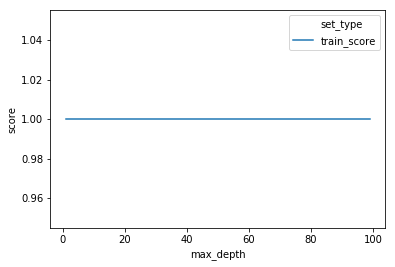

In [106]:
# преобразуем (расплавим) таблицу для визуализации
score_data_long = pd.melt(scores_data, 
                          id_vars=['max_depth'], 
                          value_vars=['train_score'
#                                       , 'cross_val_score'
                                     ], 
                          var_name='set_type', 
                          value_name='score'
                         )

# построим график
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long)

In [133]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
from collections import Counter    
words = clf.predict(X_test)

list(zip(Counter(words).keys(), Counter(words).values()))

[('собачка', 45), ('котик', 55)]

In [5]:
df_song = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [6]:
# преобразуем датасет для классификации
X = df_song.drop(['song'], axis=1)
y = df_song['song']

# импортируем библиотеку для разбивки выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split

# разбиваем выборку в пропорции 0,67/0,33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# зададим глубине дерева диапазон
max_depth_values = range(1, 100)

# создадим пустой датафрейм для накопления данных
scores_data = pd.DataFrame()

# итерируемся 100 раз в разной глубиной дерева
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    
#     mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_data = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [train_score] 
#         'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(temp_data)


In [ ]:
# преобразуем (расплавим) таблицу для визуализации
score_data_long = pd.melt(scores_data, 
                          id_vars=['max_depth'], 
                          value_vars=['train_score'
#                                       , 'cross_val_score'
                                     ], 
                          var_name='set_type', 
                          value_name='score'
                         )

# построим график
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long)